In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [51]:
folder = '/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/datauniform/2024-07-27_15-27-16PARTIAL_CONDENSING_HPIPM100800regedingnewx0'
#folder = '/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/data/2024-07-29_09-02-18PARTIAL_CONDENSING_HPIPM100800'

density=True

data = {}
for i in os.listdir(folder):
    if i[-4:]=='.pkl':
        with open(folder+'/'+i,'rb') as f:
            data[i[:-4]] = pickle.load(f)

In [15]:
data.keys()

dict_keys(['errors', 'safehor_hist', 'x_u', 'coreused', 'error_jump', 'jumps'])

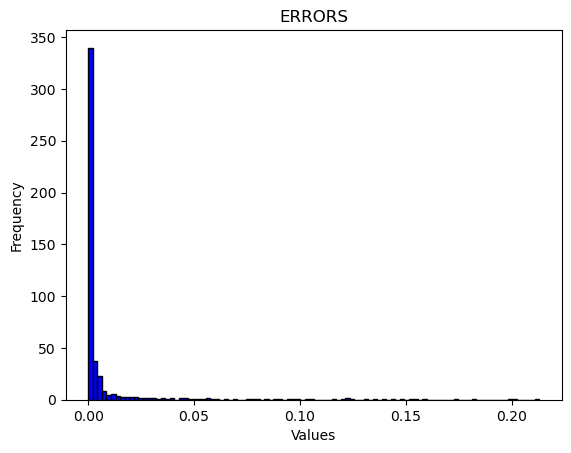

0.2130256542491062

In [16]:
err = [item for sublist in data['errors'] for item in sublist]
err=np.array(err).flatten()
err=err[~np.isnan(err)]
err = err[err > 1e-4]

plt.hist(err,density=True,bins=100, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('ERRORS')
 
# Display the plot
plt.show()

np.max(err)

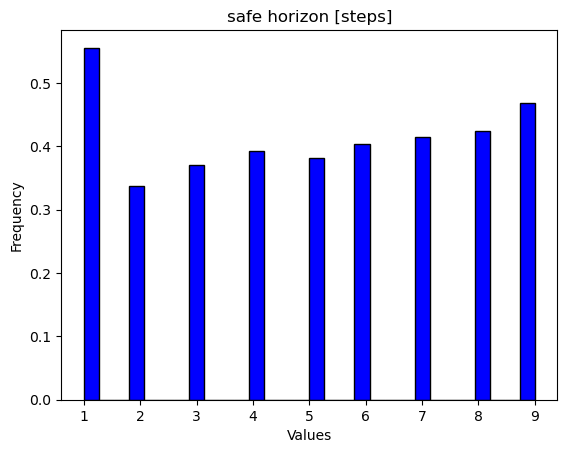

In [58]:
horizon_safe = []
for i in range(len(data['safehor_hist'])):
    for j in range(len(data['safehor_hist'][i])):
        horizon_safe.append(data['safehor_hist'][i][j])
horizon_safe=np.array(horizon_safe)

plt.hist(horizon_safe[horizon_safe<10],density=False, bins=30, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('safe horizon [steps]')
 
# Display the plot
plt.show()

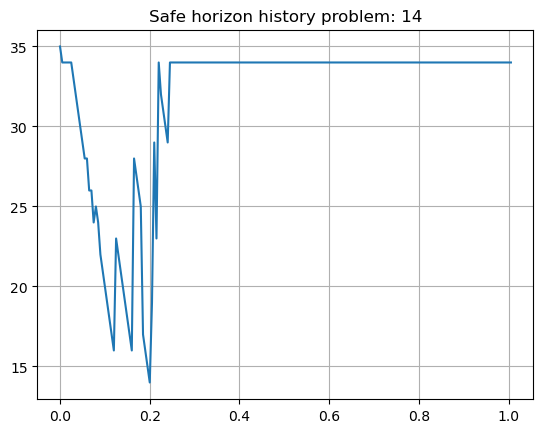

In [49]:
n=14
plotted=data['safehor_hist'][n]

plt.figure()
plt.title(f'Safe horizon history problem: {n}')
plt.grid(True)
plt.plot(np.arange(0,len(plotted))*5e-3,plotted)
plt.show()
plt.close()

In [42]:
for i in range(len(data['safehor_hist'])):
    minimumhor = min(data['safehor_hist'][i])
    if minimumhor<10:
        print(f'problem {i} minimum {minimumhor}')

problem 0 minimum 1
problem 1 minimum 8
problem 3 minimum 3
problem 4 minimum 3
problem 5 minimum 1
problem 6 minimum 7
problem 7 minimum 4
problem 8 minimum 1
problem 10 minimum 9
problem 13 minimum 1
problem 15 minimum 1
problem 17 minimum 1
problem 19 minimum 9
problem 21 minimum 1
problem 22 minimum 1
problem 23 minimum 1
problem 25 minimum 1
problem 26 minimum 1
problem 27 minimum 1
problem 28 minimum 1
problem 29 minimum 1
problem 30 minimum 1
problem 32 minimum 1
problem 33 minimum 1
problem 36 minimum 1
problem 37 minimum 1
problem 38 minimum 1
problem 39 minimum 1
problem 42 minimum 1
problem 44 minimum 1
problem 45 minimum 1
problem 47 minimum 1
problem 49 minimum 1
problem 50 minimum 9


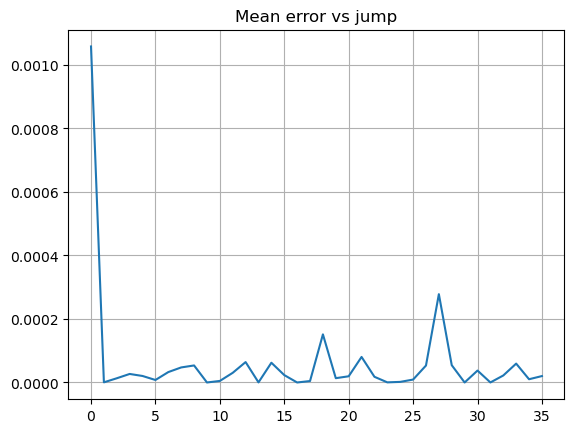

In [19]:
mean_error_jump  = [sublist if sublist else [0] for sublist in data['error_jump']]
for i in range(len(mean_error_jump)):
   a = np.array(mean_error_jump[i])
   a = a[~np.isnan(a)]
   mean_error_jump[i] = np.mean(a)


plt.figure()
plt.title('Mean error vs jump')
plt.grid(True)
plt.plot(mean_error_jump)
plt.show()
plt.close()

In [11]:
len(mean_error_jump)

35

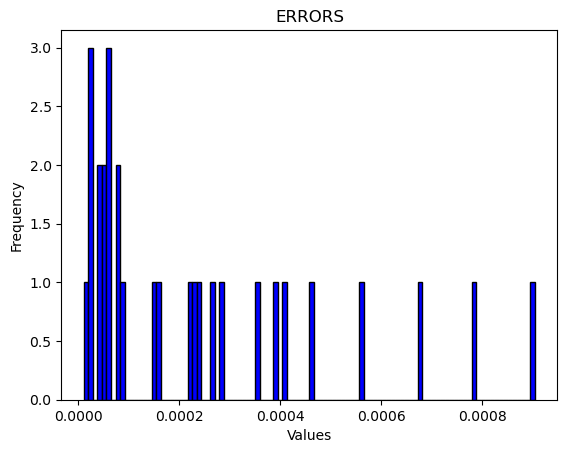

In [20]:
n_jump=2
err_jump=np.array(data['error_jump'][n_jump]).flatten()
err_jump=err_jump[~np.isnan(err_jump)]
err_jump = err_jump[err_jump > 1e-5]

plt.hist(err_jump, bins=100, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('ERRORS')
 
# Display the plot
plt.show()


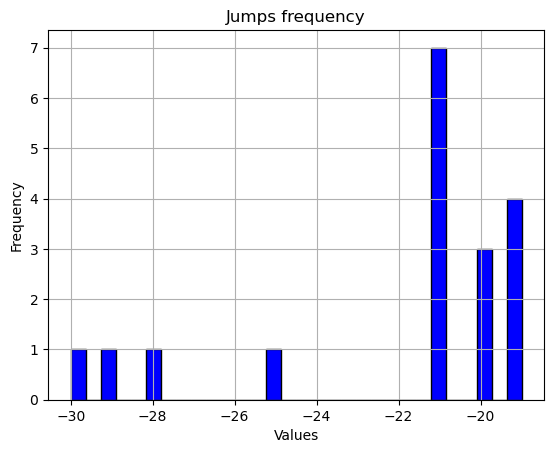

-0.057217078531938984

In [47]:
jumps = np.array(data['jumps']) 
#jumps=jumps[jumps>0]
#jumps=jumps[jumps<1]
plt.hist(jumps, bins=30,range=[-30, -19], color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Jumps frequency')
plt.grid(True)

 
# Display the plot
plt.show(True)

max(jumps)
np.mean(jumps)

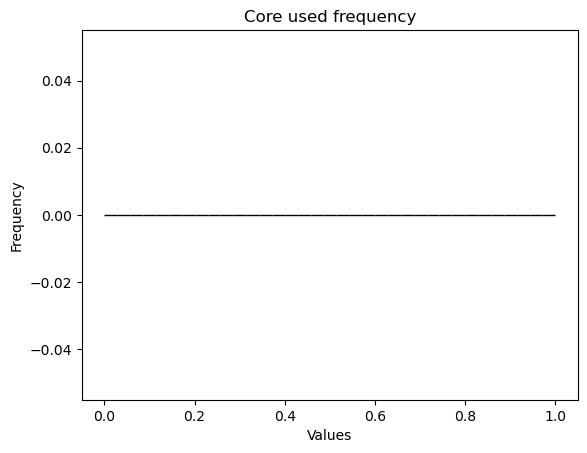

ValueError: max() arg is an empty sequence

In [20]:
core = np.array(data['coreused'])
plt.hist(core[core<=36], bins=35, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Core used frequency')
 
# Display the plot
plt.show()

max(core)

In [21]:
xu = data['x_u']
x0=[]
x=xu['x_sim']
tot=0
for i in range(len(x)):
    tot+=len(x[i])
    x0.append(x[i][0][0])
tot

15113

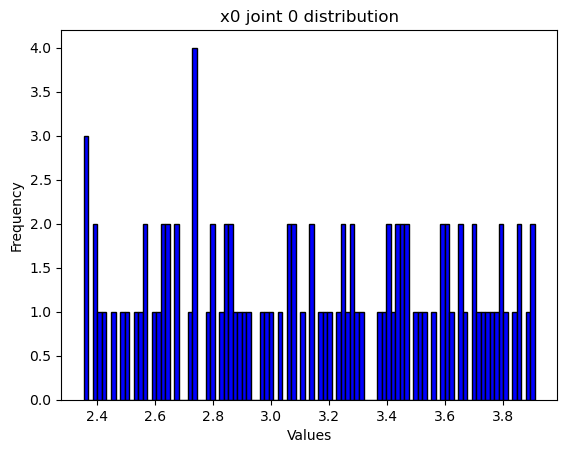

In [22]:
plt.hist(x0, bins=100, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('x0 joint 0 distribution')
 
# Display the plot
plt.show()

In [2]:
x0resampled=np.load('/home/elias/Documents/Optim/safe-mpc-2-setp/data/x_init_20.npy')

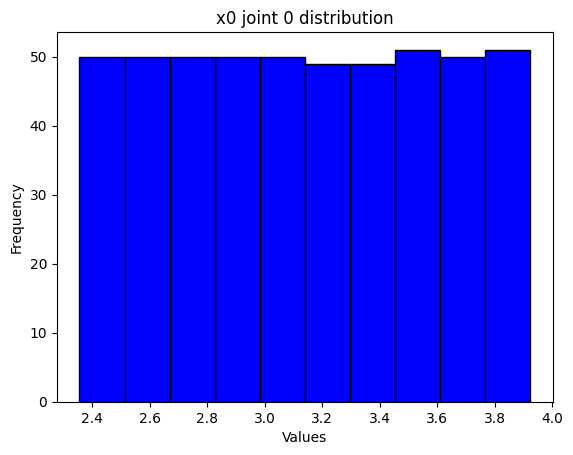

In [4]:
plt.hist(x0resampled[:,0], bins=10, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('x0 joint 0 distribution')
 
# Display the plot
plt.show()

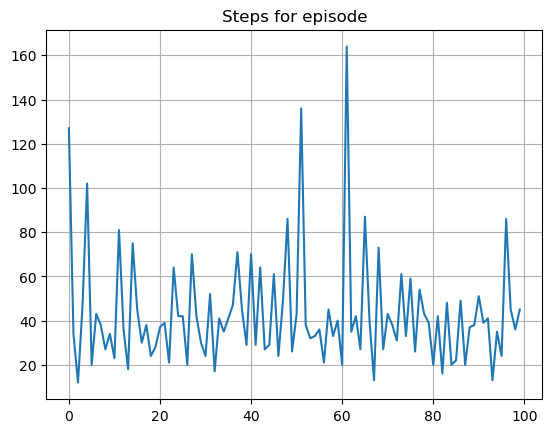

In [34]:
plt.figure(f'Position,problems')
plt.title(f'Position,problems')
plt.clf()
plt.xlabel('t')
plt.legend(['x1','x2','x3'])
plt.grid()
plt.axhline(y=controller.model.x_min[0], color='r', linestyle='-')
plt.axhline(y=controller.model.x_max[0], color='r', linestyle='-')
plt.show()

In [1]:
import numpy as np

In [4]:
def unif_alloc(cores,fix,hor):
    step = (hor-1)/cores
    if fix == 1 or fix == hor or (fix-1)% step == 0:
        l = np.linspace(1,hor,cores).round().astype(int).tolist()
    else:
        if fix < 1 + step:
            l = np.linspace(fix,hor,cores).round().astype(int).tolist()
        elif fix >  hor - step:
            l = np.linspace(1,fix,cores).round().astype(int).tolist()
        else:
            l=[] 
            l.append(fix)
            portion_h = (cores-1)*((hor - fix)/(hor-1))
            portion_h = int(portion_h) if portion_h-int(portion_h)<=0.5 else int(portion_h+1)
            portion_l = (cores-1)*((fix-1)/(hor-1))
            portion_l = int(portion_l) if portion_l-int(portion_l)<=0.5 else int(portion_l+1)
            if portion_h == portion_l and cores%2==0 or portion_h +portion_l < cores -1:
                # print(portion_h)
                # print(portion_l)
                l = np.linspace(1,round(fix-step),portion_l).round().astype(int).tolist() + l \
                      + np.linspace(round(fix+step),hor,portion_h+1).round().astype(int).tolist()
            else: 
                l = np.linspace(1,round(fix-step),portion_l).round().astype(int).tolist() + l \
                      + np.linspace(round(fix+step),hor,portion_h).round().astype(int).tolist()
        if not(len(l)==cores):
            print(f'length = cores ? {len(l)==cores}')
            print(f'cores = {cores}, fix = {fix}')
            print(l)
        if len(l) != len(set(l)):
            print(f'repeated arguments ? {len(l) != len(set(l))}')
        
            
            
    return l

In [9]:
for i in range(1,36):
    print(unif_alloc(8,i,35))

[1, 6, 11, 16, 20, 25, 30, 35]
[2, 7, 11, 16, 21, 26, 30, 35]
[3, 8, 12, 17, 21, 26, 30, 35]
[4, 8, 13, 17, 22, 26, 31, 35]
[5, 9, 14, 18, 22, 26, 31, 35]
[1, 6, 10, 15, 20, 25, 30, 35]
[1, 7, 11, 16, 21, 25, 30, 35]
[1, 8, 12, 17, 21, 26, 30, 35]
[1, 5, 9, 13, 18, 24, 30, 35]
[1, 6, 10, 14, 19, 24, 30, 35]
[1, 7, 11, 15, 20, 25, 30, 35]
[1, 8, 12, 16, 21, 26, 30, 35]
[1, 9, 13, 17, 22, 26, 30, 35]
[1, 6, 10, 14, 18, 24, 29, 35]
[1, 6, 11, 15, 19, 24, 30, 35]
[1, 6, 12, 16, 20, 25, 30, 35]
[1, 7, 13, 17, 21, 26, 30, 35]
[1, 6, 11, 16, 20, 25, 30, 35]
[1, 6, 10, 15, 19, 23, 29, 35]
[1, 6, 11, 16, 20, 24, 30, 35]
[1, 6, 12, 17, 21, 25, 30, 35]
[1, 7, 12, 18, 22, 26, 30, 35]
[1, 6, 10, 14, 19, 23, 27, 35]
[1, 6, 10, 15, 20, 24, 28, 35]
[1, 6, 11, 16, 21, 25, 29, 35]
[1, 6, 12, 17, 22, 26, 30, 35]
[1, 6, 12, 18, 23, 27, 31, 35]
[1, 6, 10, 15, 19, 24, 28, 32]
[1, 6, 11, 15, 20, 25, 29, 33]
[1, 6, 11, 16, 21, 26, 30, 34]
[1, 5, 10, 14, 18, 22, 27, 31]
[1, 5, 10, 14, 19, 23, 28, 32]
[1, 6, 10

In [10]:
import numpy as np
import pickle 
import os

In [13]:
folder = '/home/utente/Documents/Optim/safe-mpc/DATI_PARALLELIZED/ParallelWithCheck_minJump-1_errThr0.001_alpha2/ParallelWithCheck_minJump-1_errThr0.001_alpha2x_viable.npy'
par_v = np.load('/home/utente/Documents/Optim/safe-mpc/DATI_PARALLELIZED/ParallelWithCheck_minJump-1_errThr0.001_alpha2/ParallelWithCheck_minJump-1_errThr0.001_alpha2x_viable.npy')
rec_v = np.load('/home/utente/Documents/Optim/safe-mpc/DATI_PARALLELIZED/RecedingController_minJump-1_errThr0.001_alpha2/RecedingController_minJump-1_errThr0.001_alpha2x_viable.npy')


In [16]:
import matplotlib.pyplot as plt

In [17]:
figure

NameError: name 'figure' is not defined